In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.covariance import EmpiricalCovariance
from scipy import linalg

In [1]:
import sys
import math

sys.path.append("../..")
from src.main import *
from src.utils.slq import slq

In [3]:
M = {
     "10sphere": {
         "intdim": 10,
         "ambdim": 11,
         "n": 500,
         "dataset": np.vectorize(lambda n : generate_spheres(d = 10, r = 1, n=n))
     },
     "15sphere": {
         "intdim": 15,
         "ambdim": 16,
         "n": 500,
         "dataset": np.vectorize(lambda n : generate_spheres(d = 15, r = 1, n=n))
     },
     "affine_3_5": {
         "intdim": 3,
         "ambdim": 5,
         "n": 500,
         "dataset": np.vectorize(lambda n : generate_affine_3_5_space(n=n))
     },
     "concentrated": {
         "intdim": 4,
         "ambdim": 6,
         "n": 500,
         "dataset": np.vectorize(lambda n : generate_4_6_confusable_figure(n=n))
     },
     "nonlinear_4_8": {
         "intdim": 4,
         "ambdim": 8,
         "n": 500,
         "dataset": np.vectorize(lambda n : generate_affine_4_8_space(n=n))
     },
     "2d_helix" : {
         "intdim": 2,
         "ambdim": 3,
         "n": 500,
         "dataset": np.vectorize(lambda n: generate_helix_2_3(n=n))
     },
     "nonlinear_6_36": {
         "intdim": 6,
         "ambdim": 36,
         "n": 500,
         "dataset": np.vectorize(lambda n : generate_affine_6_36_space(n=n))
     },
     "swiss_roll": {
         "intdim": 2,
         "ambdim": 3,
         "n": 500,
         "dataset": np.vectorize(lambda n : generate_swiss_roll(n=n))
     },
     "nonlinear_12_72": {
         "intdim": 12,
         "ambdim": 72,
         "n": 500,
         "dataset": np.vectorize(lambda n: generate_12_manifold(n=n))
     },
     "affine_20_20": {
         "intdim": 20,
         "ambdim": 20,
         "n": 500,
         "dataset": np.vectorize(lambda n : generate_same_dim_space(20, n=n))
     },
     "uniform_10_hypercube": {
         "intdim": 10,
         "ambdim": 11,
         "n": 500,
         "dataset": np.vectorize(lambda n : generate_k_hypercube(11, n=n))
     },
     "uniform_17_hypercube": {
         "intdim": 17,
         "ambdim": 18,
         "n": 500,
         "dataset": np.vectorize(lambda n : generate_k_hypercube(18, n=n)),
     },
     "uniform_24_hypercube": {
         "intdim": 24,
         "ambdim": 25,
         "n": 500,
         "dataset": np.vectorize(lambda n : generate_k_hypercube(25, n=n)),
     },
     "13_curve": {
         "intdim": 1,
         "ambdim": 13,
         "n": 500,
         "dataset": np.vectorize(lambda n: generate_kd_curve(13, n=n))
     },
     "10_mobius": {
         "intdim": 2,
         "ambdim": 3,
         "n": 500,
         "dataset": np.vectorize(lambda n: generate_k_mobius(n=n, k=10))
     },
     "10_mobius_noisy": {
         "intdim": 2,
         "ambdim": 3,
         "n": 500,
         "dataset": np.vectorize(lambda n: generate_k_mobius(n=n, k=10, noise=0.4))
     }
}

In [13]:
def ip_est(data):

    if data.ndim > 1:
        d, n = data.shape
    else:
        d, n = 1, len(data)
        
    var = (n * (d + 2) / 4.)**(-1. / (d + 4)) * data.std()
    h = var*math.sqrt(2)

#     IQR = np.subtract.reduce(np.percentile(data, [75,25]))
#     A = min(std(data, ddof=1), IQR/1.349)
#     var = .9*A*n**(-1/5.)
#     h = var*math.sqrt(2)

    total = 0
    for i in range(n):
        for j in range(i):
            diff = data[j] - data[i]
            total += 1/(math.sqrt(2.*np.pi)*h) * math.exp(-(diff**2)/(2*h**2))
    
#     curry = lambda f, x: lambda y: f(x, y)
#     gauss = lambda x, y: 1/(math.sqrt(2.*np.pi)*h) * math.exp(-((y - x)**2)/(2*h**2))
    total *= 2
    return 1/(n**2) * total

In [14]:
def custom_run(intdim, ambdim, epsilon = 0.975, title = "", m = 20, n = 500, dataset = np.vectorize(lambda n: generate_k_mobius(n=n, k=5))):
    print(f"estimating ID for {title}")
    print("ID: ", intdim)

    pca_values = [0]*m
    ip_values = [0]*m
    for i in range(m):
        data = dataset(n)
        cov = EmpiricalCovariance().fit(data.T)
        eigenvalues = [0]*len(data)
        for j, d in enumerate(data):
            ip = ip_est(d)
            eigenvalues[j] = ip
        print("Information Potentials: ")
        print(eigenvalues)
        # replace lambda max by var max
        print("Lambdas: ")
        print(cov.covariance_.diagonal())
        print()
        pca_values[i] = cov.covariance_.trace() / np.amax(cov.covariance_.diagonal())
        ip_values[i] = min(i for i in eigenvalues if i > 0)*sum([lmbd**(-1) if (lmbd > 0) else 0 for lmbd in eigenvalues])
    print("PCA: " + str(sum(pca_values)/len(pca_values)))
    print("IP: " + str(sum(ip_values)/len(ip_values)))

In [ ]:
def custom_run_2(intdim, ambdim, epsilon = 0.975, title = "", m = 20, n = 500, dataset = np.vectorize(lambda n: generate_k_mobius(n=n, k=5))):
    print(f"estimating ID for {title}")
    print("ID: ", intdim)

    values = [0]*m
    for i in range(m):
        data = dataset(n)
        eigenvalues = [0]*len(data)
        for j, d in enumerate(data):
            ip = ip_est(d)
            eigenvalues[j] = ip
        values[i] = min(i for i in eigenvalues if i > 0)*sum([lmbd**(-1) if (lmbd > 0) else 0 for lmbd in eigenvalues])
    print(sum(values)/len(values))

In [15]:
custom_run(2,3, dataset = M["10_mobius"]["dataset"])

estimating ID for 
ID:  2
Information Potentials: 
[0.38007400916689427, 0.36753537741763637, 1.3551439198916813]
Lambdas: 
[0.47853723 0.54355473 0.04058486]

Information Potentials: 
[0.36026006113351766, 0.3694416171861477, 1.3167020027135083]
Lambdas: 
[0.52760129 0.51874785 0.04198482]

Information Potentials: 
[0.36993691329870493, 0.37481877981250905, 1.426137057580754]
Lambdas: 
[0.5179308  0.50860864 0.03809038]

Information Potentials: 
[0.3700007459299015, 0.3594026120684579, 1.3312884550664286]
Lambdas: 
[0.50331409 0.56642006 0.0402081 ]

Information Potentials: 
[0.362431444519603, 0.36047438121088854, 1.2763605992650002]
Lambdas: 
[0.51602138 0.54546079 0.04500419]

Information Potentials: 
[0.3708837616313752, 0.36147061064509217, 1.3274352475743338]
Lambdas: 
[0.51638426 0.52391929 0.0434149 ]

Information Potentials: 
[0.3599597859989996, 0.37300885359895103, 1.194420241180836]
Lambdas: 
[0.52928938 0.49982382 0.04932123]

Information Potentials: 
[0.3596958737076561,

In [16]:
custom_run(2,3, dataset = M["10_mobius_noisy"]["dataset"])

estimating ID for 
ID:  2
Information Potentials: 
[0.31085140078338, 0.31905078891131616, 0.593152678621354]
Lambdas: 
[0.68447752 0.65826084 0.2105605 ]

Information Potentials: 
[0.3164871866673618, 0.32242526663502064, 0.5809150168157636]
Lambdas: 
[0.66869381 0.64079471 0.21135824]

Information Potentials: 
[0.3117595156267834, 0.31282469999856477, 0.5594707562795342]
Lambdas: 
[0.68946616 0.68219306 0.22767186]

Information Potentials: 
[0.3071718532509548, 0.30780593830706504, 0.5949270078800519]
Lambdas: 
[0.71051491 0.70315877 0.20872633]

Information Potentials: 
[0.31282882107520954, 0.3150624844764078, 0.5664037151263833]
Lambdas: 
[0.68472233 0.66917571 0.21446148]

Information Potentials: 
[0.3107120419182266, 0.3141136737511851, 0.6282630615060801]
Lambdas: 
[0.68837287 0.67784001 0.18624448]

Information Potentials: 
[0.33075200339100364, 0.3049321190325222, 0.6409043003252504]
Lambdas: 
[0.61424321 0.71625232 0.18327912]

Information Potentials: 
[0.3079975264203661, 0

In [17]:
custom_run(3,5, dataset = M["affine_3_5"]["dataset"])

estimating ID for 
ID:  3
Information Potentials: 
[0.688245756228894, 0.913902670756467, 0.7725169442612044, 0.8839949052229066, 0.7740902658980012]
Lambdas: 
[0.13928952 0.07969207 0.11057641 0.08412934 0.110096  ]

Information Potentials: 
[0.7162898145688897, 0.8895630437215286, 0.8068864516193531, 0.938864260658924, 0.806148713453591]
Lambdas: 
[0.12782331 0.08387252 0.10156595 0.07618701 0.10158543]

Information Potentials: 
[0.6587023126424408, 0.8647195098736826, 0.8045113522157671, 0.8901498873602087, 0.7603632757248594]
Lambdas: 
[0.15101595 0.08901305 0.10302039 0.08350361 0.11384424]

Information Potentials: 
[0.6876211744490962, 0.8496955009403573, 0.8171589366461206, 0.8962069003721519, 0.7860682710231571]
Lambdas: 
[0.13917727 0.09096247 0.09967605 0.08221088 0.10944987]

Information Potentials: 
[0.6846813225538301, 0.8559922856194346, 0.7883685233672386, 0.889955415324487, 0.7873283255658834]
Lambdas: 
[0.14171514 0.09134942 0.10672222 0.0829125  0.10741051]

Informati

In [19]:
custom_run(2,3, dataset = M["swiss_roll"]["dataset"])

estimating ID for 
ID:  2
Information Potentials: 
[0.11369932077868523, 0.10892826769444024, 0.10892826769444024]
Lambdas: 
[5.82912762 6.37133507 6.37133507]

Information Potentials: 
[0.10169228631095695, 0.09520142742682793, 0.09520142742682793]
Lambdas: 
[6.74066557 7.78551307 7.78551307]

Information Potentials: 
[0.10141231600484793, 0.1101866881444107, 0.1101866881444107]
Lambdas: 
[6.79903754 6.1557477  6.1557477 ]

Information Potentials: 
[0.10223999812356621, 0.10954787904476965, 0.10954787904476965]
Lambdas: 
[6.68267512 6.5255551  6.5255551 ]

Information Potentials: 
[0.10654530695100826, 0.10705538354611828, 0.10705538354611828]
Lambdas: 
[6.56243825 6.54229934 6.54229934]

Information Potentials: 
[0.10540607425080017, 0.10716327349297226, 0.10716327349297226]
Lambdas: 
[6.45769972 6.88833314 6.88833314]

Information Potentials: 
[0.11151889306243884, 0.10744810464532134, 0.10744810464532134]
Lambdas: 
[6.06336195 6.64727084 6.64727084]

Information Potentials: 
[0.107

In [20]:
def run_sphere(dataset = np.vectorize(lambda x, y: generate_spheres(d = x, n = y))):
    for k in range(3, 6):
        custom_run(k, k+1, title=f"{k} sphere", dataset=np.vectorize(lambda x: dataset(k, x)))

In [21]:
run_sphere()

estimating ID for 3 sphere
ID:  3
Information Potentials: 
[0.3942127279314317, 0.5035486188314463, 0.518675011204982, 0.8754010120174022]
Lambdas: 
[0.48168148 0.26250657 0.25426002 0.11781145]

Information Potentials: 
[0.3913093085853242, 0.5106788255127386, 0.5512776763228365, 0.9147218681507387]
Lambdas: 
[0.50918462 0.25920271 0.23005298 0.11449192]

Information Potentials: 
[0.39720239523908496, 0.5389140806928245, 0.5119843887435142, 0.8363019651633509]
Lambdas: 
[0.50590713 0.23744307 0.25485201 0.12842163]

Information Potentials: 
[0.3919478494175334, 0.5096170926720441, 0.5405625511196096, 0.8882366842118921]
Lambdas: 
[0.50724444 0.26004389 0.23260458 0.12142474]

Information Potentials: 
[0.3993804841807726, 0.5290185040760015, 0.5484302364861101, 0.9199826495203757]
Lambdas: 
[0.52151638 0.24422091 0.23090322 0.11267887]

Information Potentials: 
[0.3880844383104141, 0.5235805567500205, 0.514962887073826, 0.8351417676380202]
Lambdas: 
[0.49553215 0.2509012  0.25255637 0.

Information Potentials: 
[0.39901563375671356, 0.515303480695424, 0.5295923024389081, 0.8561285225418985, 0.8934511684595993, 1.5074551469697135]
Lambdas: 
[0.49652928 0.25547415 0.24433814 0.12218175 0.12355882 0.05754165]

Information Potentials: 
[0.39389349234902443, 0.5662156863746007, 0.5117803369595593, 0.8592263678282415, 0.8177850760541597, 1.5467356067940934]
Lambdas: 
[0.52417587 0.21344618 0.25957472 0.12541459 0.13472673 0.0551607 ]

Information Potentials: 
[0.39227122653986046, 0.5332144882316766, 0.5441588729775542, 0.8690870224557391, 0.8986028821493981, 1.4769020005987872]
Lambdas: 
[0.52397898 0.24527562 0.22974959 0.11653198 0.1122083  0.05478175]

Information Potentials: 
[0.3936707863817971, 0.5259985923213559, 0.5358630736442537, 0.937002804100023, 0.835310569099758, 1.4444593271750794]
Lambdas: 
[0.51319375 0.24509244 0.24135738 0.11205353 0.12865974 0.06250589]

Information Potentials: 
[0.39311440855866536, 0.5419025636704197, 0.5254324357743317, 0.83757369773

In [201]:
custom_run(1,13, dataset = M["13_curve"]["dataset"])

estimating ID for 
ID:  1
Information Potentials: 
[0.8896014009918638, 1.036531559809602, 1.0356094286431494, 1.205970743905999, 1.41911459994223, 1.5818715705698283, 1.7724626755365036, 1.9840007272181457, 2.1449129450844087, 2.336213362536413, 2.5264512167592934, 2.8116703774427982, 3.0361754585301504]
Lambdas: 
[0.08473835 0.06500463 0.06501763 0.06277227 0.06030676 0.05837839
 0.05371796 0.0485293  0.04445818 0.04017428 0.03620064 0.03227134
 0.02909167]

Information Potentials: 
[0.9166463801724147, 1.0438371805878413, 1.0072833090252562, 1.2131016976112252, 1.5134579496261966, 1.7290022858023255, 1.9472112061882947, 2.091641843491068, 2.298549305160936, 2.5276734430784638, 2.7602064106424344, 2.960558326211651, 3.134192557596655]
Lambdas: 
[0.07942496 0.06831579 0.06912326 0.06082578 0.05485371 0.05093152
 0.04748211 0.0445899  0.04073795 0.03643745 0.03262622 0.02960733
 0.02708287]

Information Potentials: 
[0.9064262896417355, 1.0547731518784003, 1.0211393520534744, 1.3383624

Information Potentials: 
[0.9156410216638511, 1.0489123076679672, 1.0678956746219355, 1.3444428199179357, 1.5501397837387982, 1.8087853187076786, 1.9507206299604498, 2.2097818484788365, 2.352760332583466, 2.531974833376461, 2.6266444616629365, 2.866478316784723, 3.065186127999697]
Lambdas: 
[0.07957666 0.06602619 0.06190384 0.05484322 0.0508662  0.04728274
 0.0454468  0.04232337 0.03975833 0.0372082  0.03519958 0.03285619
 0.03063415]

PCA: 7.854976704531626
IP: 7.217147570232823


In [22]:
from scipy import stats

def get_dist(X):
    kernel = stats.gaussian_kde(X)
    class rv(stats.rv_continuous):
        def _rvs(self, *x, **y):
            return kernel.resample(int(self._size))
        def _cdf(self, x):
            return kernel.integrate_box_1d(-np.Inf, x)
        def _pdf(self, x):
            return kernel(x)
    return rv(name="kdedist")

In [171]:
def plot_dist(func, value=[-2, 2], n = 200):
    fig = plt.figure()
    ax = fig.add_subplot()

    x_eval = np.linspace(value[0], value[1], num=n)
    ax.plot(x_eval, func.pdf(x_eval), 'r-', label="Silverman's Rule")

    plt.show()

In [179]:
dataset = generate_kd_curve(13, n=n)

In [218]:
x1 = get_dist(dataset[0])
x2 = get_dist(dataset[1])
x3 = get_dist(dataset[2])
x4 = get_dist(dataset[3])
x5 = get_dist(dataset[4])
x6 = get_dist(dataset[5])
x7 = get_dist(dataset[6])
x8 = get_dist(dataset[7])
x9 = get_dist(dataset[8])
x10 = get_dist(dataset[9])
x11 = get_dist(dataset[10])
x12 = get_dist(dataset[11])
x100 = get_dist(dataset[12])

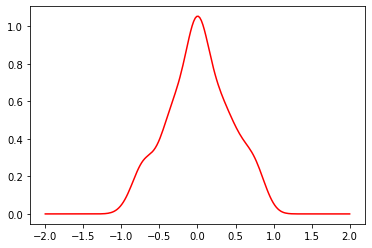

In [233]:
plot_dist(x100)

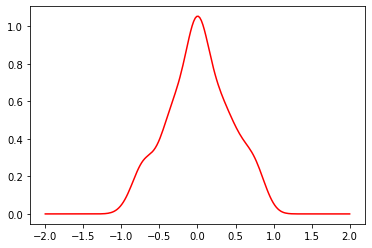

In [220]:
plot_dist(x1)

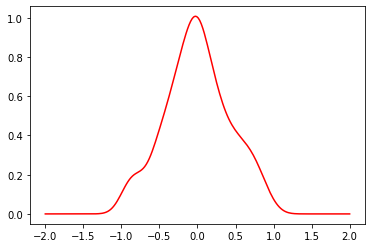

In [221]:
plot_dist(x2)

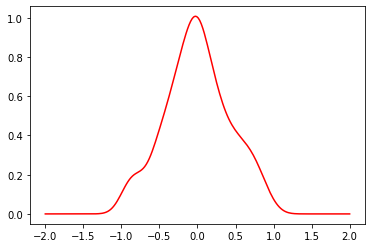

In [222]:
plot_dist(x2)

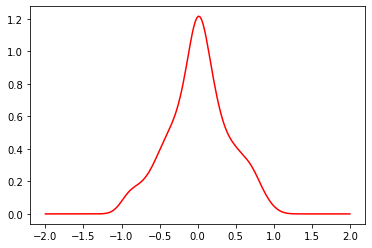

In [223]:
plot_dist(x3)

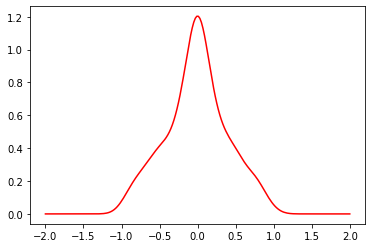

In [224]:
plot_dist(x4)

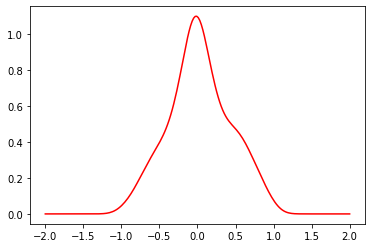

In [225]:
plot_dist(x5)

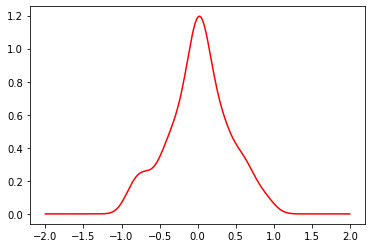

In [226]:
plot_dist(x6)

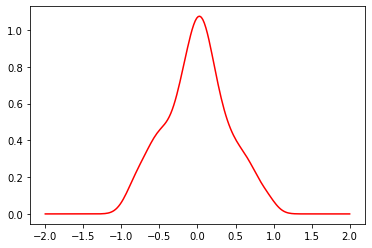

In [227]:
plot_dist(x7)

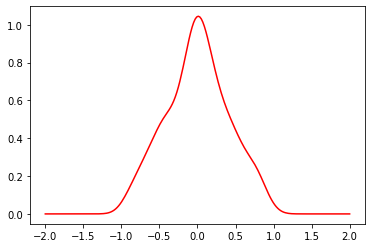

In [228]:
plot_dist(x8)

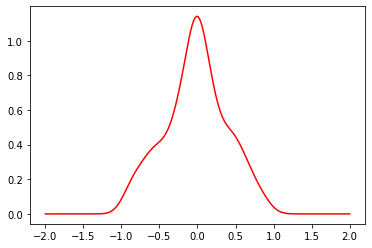

In [229]:
plot_dist(x9)

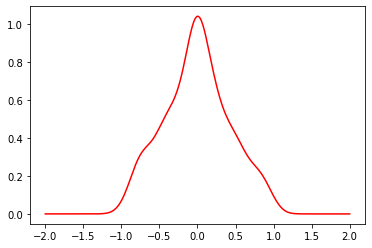

In [230]:
plot_dist(x10)

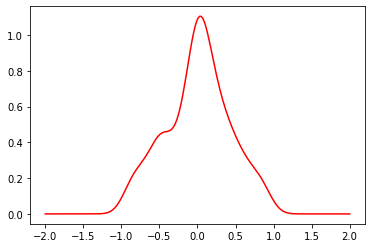

In [231]:
plot_dist(x11)

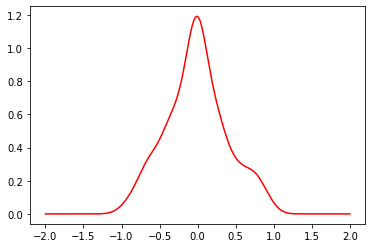

In [232]:
plot_dist(x12)